In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [3]:
stocksymbols = ['TATAMOTORS.NS']
startdate = date(2017,8,4)
end_date = date.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

data = getMyPortfolio(stocksymbols)
data

2024-05-05
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017
...,...,...,...,...,...,...
2024-04-26,1007.799988,1008.950012,996.599976,999.500000,999.500000,7937500
2024-04-29,1003.049988,1005.750000,999.000000,1000.599976,1000.599976,4764750
2024-04-30,1005.000000,1019.450012,997.500000,1007.900024,1007.900024,9047011


In [4]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)

#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,1007.799988,1008.950012,996.599976,999.500000,999.500000,7937500,987.786668,881.138001,NaN,NaN
2024-04-29,1003.049988,1005.750000,999.000000,1000.599976,1000.599976,4764750,987.256667,884.020501,NaN,NaN
2024-04-30,1005.000000,1019.450012,997.500000,1007.900024,1007.900024,9047011,988.413334,887.035501,NaN,NaN


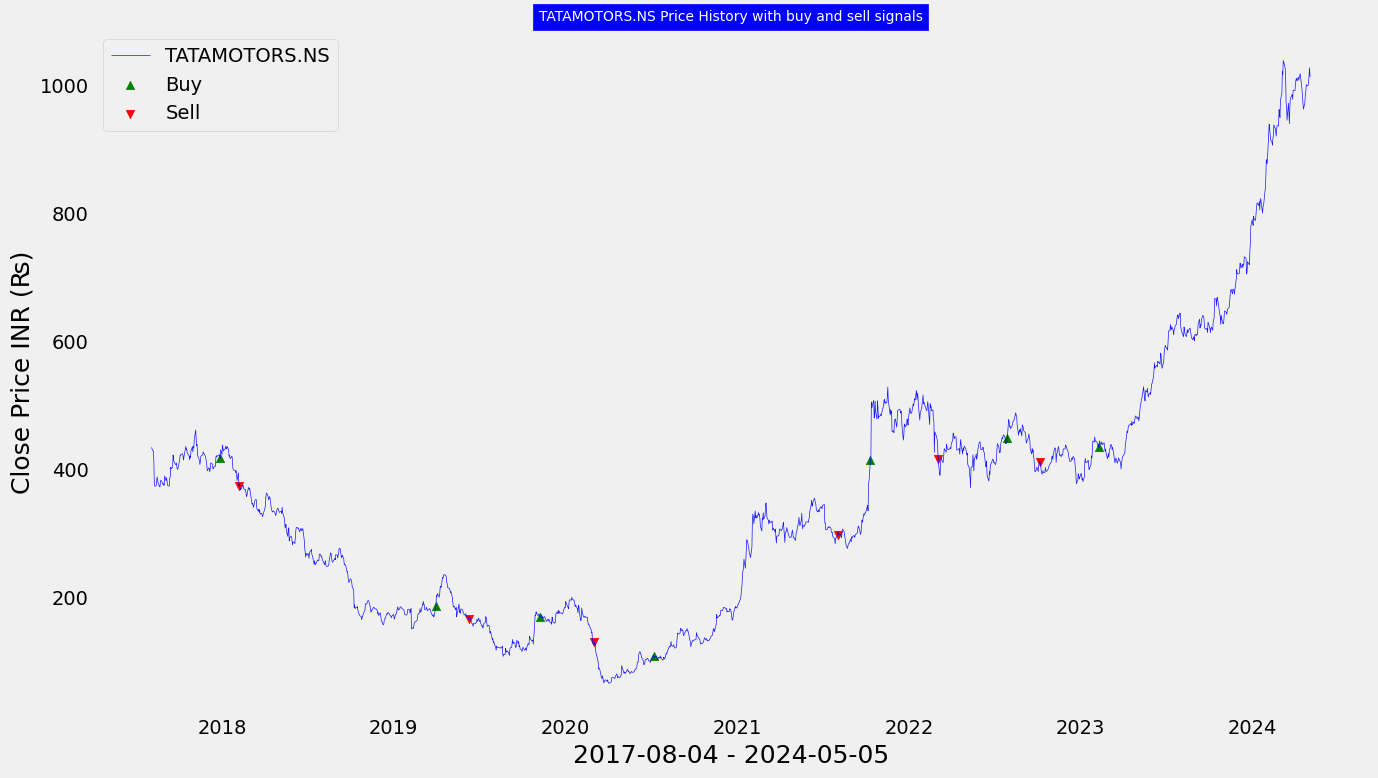

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
#ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
#ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [9]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04,NaN,NaN,NaN
2017-08-07,NaN,NaN,NaN
2017-08-08,NaN,NaN,NaN
2017-08-09,NaN,NaN,NaN
2017-08-10,NaN,NaN,NaN
...,...,...,...
2024-04-26,5.223606,-2.300091,7.523697
2024-04-29,5.511976,-1.609377,7.121353
2024-04-30,6.257432,-0.691137,6.948569


In [10]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
#data

def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [11]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy

In [ ]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

In [ ]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

In [14]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

#storing the function
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,1007.799988,1008.950012,996.599976,999.500000,999.500000,7937500,987.786668,881.138001,NaN,NaN,...,NaN,NaN,True,966.270483,996.437500,1026.604517,6.054974,0.550759,NaN,NaN
2024-04-29,1003.049988,1005.750000,999.000000,1000.599976,1000.599976,4764750,987.256667,884.020501,NaN,NaN,...,NaN,NaN,True,968.458937,997.534998,1026.611058,5.829582,0.552706,NaN,NaN
2024-04-30,1005.000000,1019.450012,997.500000,1007.900024,1007.900024,9047011,988.413334,887.035501,NaN,NaN,...,NaN,NaN,True,968.961858,998.289999,1027.618141,5.875676,0.663836,NaN,NaN


C:\Users\ishub\AppData\Local\Temp\ipykernel_6592\967351678.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)


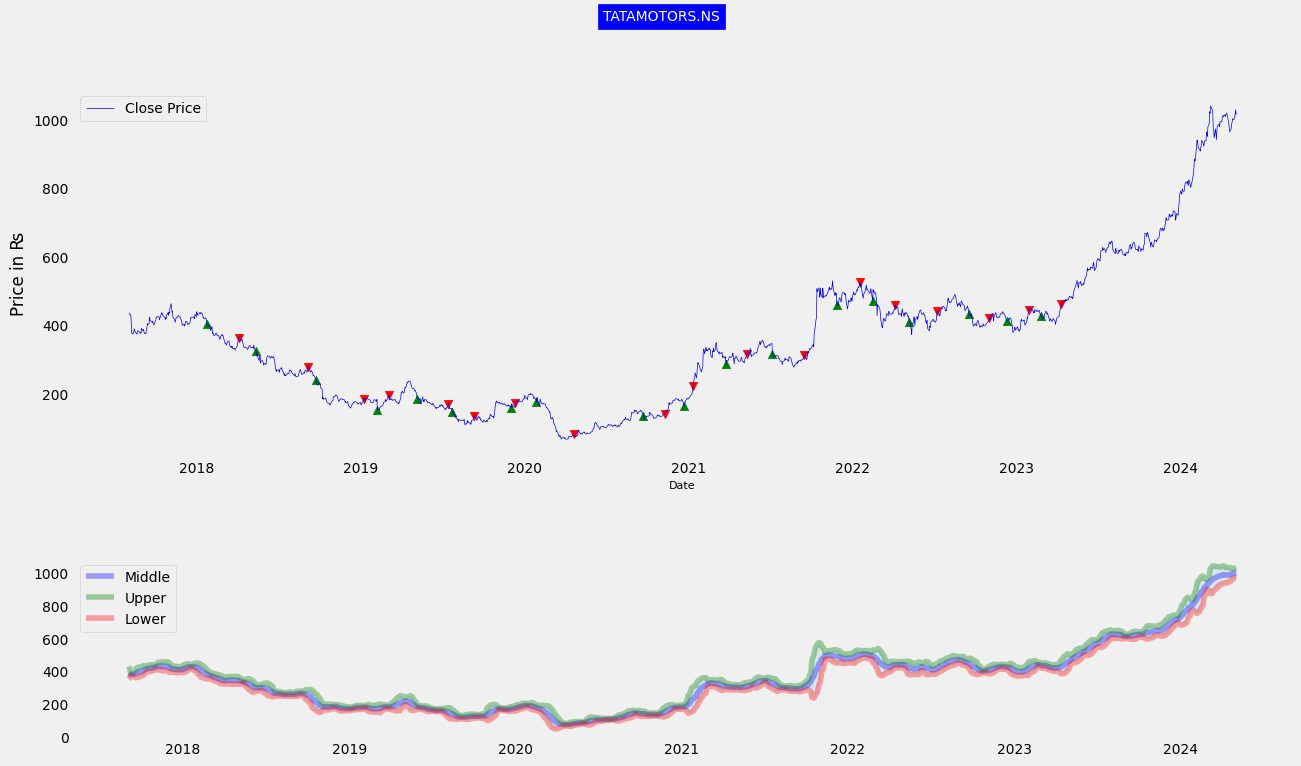

In [15]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()